In [1]:
import os


In [2]:
cwd = os.getcwd()

In [21]:
os.path.join(cwd, "Image_Data/DSCI411_Project/real-vs-fake/train/real")

'/home/jupyter-shv222/Image_Data/DSCI411_Project/real-vs-fake/train/real'

In [3]:
train_real_folder_path = os.path.join(cwd, "Image_Data/DSCI411_Updated_Data/real-vs-fake/train/real")
train_fake_folder_path = os.path.join(cwd, "Image_Data/DSCI411_Updated_Data/real-vs-fake/train/fake")
test_real_folder_path = os.path.join(cwd, "Image_Data/DSCI411_Updated_Data/real-vs-fake/test/real")
test_fake_folder_path = os.path.join(cwd, "Image_Data/DSCI411_Updated_Data/real-vs-fake/test/fake")
valid_real_folder_path = os.path.join(cwd, "Image_Data/DSCI411_Updated_Data/real-vs-fake/valid/real")
valid_fake_folder_path = os.path.join(cwd, "Image_Data/DSCI411_Updated_Data/real-vs-fake/valid/fake")

In [4]:
import numpy as np
from PIL import Image

def load_images_to_array(directory_path):
    # Get the list of image files in the directory
    image_files = [file for file in os.listdir(directory_path) if file.endswith(".jpg")]

    # Create an empty list to store the images as NumPy arrays
    images = []

    # Loop through each image file and load it as a NumPy array
    for file in image_files:
        # Construct the full file path
        file_path = os.path.join(directory_path, file)

        # Load the image using PIL
        image = Image.open(file_path)

        # Convert the image to a NumPy array
        image_array = np.array(image)

        # Append the image array to the list
        images.append(image_array)

    # Convert the list of image arrays to a NumPy array
    images_array = np.array(images)

    return images_array

In [5]:
train_real_array = load_images_to_array(train_real_folder_path)
train_fake_array = load_images_to_array(train_fake_folder_path)
test_real_array = load_images_to_array(test_real_folder_path)
test_fake_array = load_images_to_array(test_fake_folder_path)
valid_real_array = load_images_to_array(valid_real_folder_path)
valid_fake_array = load_images_to_array(valid_fake_folder_path)

In [6]:
print("train_real_array", train_real_array.shape)
print("train_fake_array", train_fake_array.shape)
print("test_real_array", test_real_array.shape)
print("test_fake_array", test_fake_array.shape)
print("valid_real_array", valid_real_array.shape)
print("valid_fake_array", valid_fake_array.shape)

train_real_array (1750, 256, 256, 3)
train_fake_array (1750, 256, 256, 3)
test_real_array (375, 256, 256, 3)
test_fake_array (375, 256, 256, 3)
valid_real_array (375, 256, 256, 3)
valid_fake_array (375, 256, 256, 3)


In [7]:
X_train = np.concatenate((train_real_array, train_fake_array), axis=0)
X_valid = np.concatenate((test_real_array, test_fake_array), axis=0)
X_test = np.concatenate((valid_real_array, valid_fake_array), axis=0)

In [8]:
y_train_real = np.ones(train_real_array.shape[0])
y_train_fake = np.zeros(train_fake_array.shape[0])
y_valid_real = np.ones(test_real_array.shape[0])
y_valid_fake = np.zeros(test_fake_array.shape[0])
y_test_real = np.ones(valid_real_array.shape[0])
y_test_fake = np.zeros(valid_fake_array.shape[0])

# Form one target variable each for training, testing and validation set.
y_train = np.concatenate((y_train_real, y_train_fake), axis=0)
y_valid = np.concatenate((y_valid_real, y_valid_fake), axis=0)
y_test = np.concatenate((y_test_real, y_test_fake), axis=0)

print("The size of the target variable for Training, testing, and validation data respectively are -- ",y_train.shape, y_test.shape, y_valid.shape)

The size of the target variable for Training, testing, and validation data respectively are --  (3500,) (750,) (750,)


In [9]:
#Normalize (0 to 255 pixel values)
X_train, X_test, X_valid  = X_train/255, X_test/255, X_valid/255;

#Convert to float32 type
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_valid = X_valid.astype('float32')




In [10]:
from keras.utils import to_categorical

#One-hot encode the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_valid = to_categorical(y_valid)

#Check the shape of the labels
print('The shape of y_train:', y_train.shape)
print('The shape of y_test:', y_test.shape)
print('The shape of y_valid:', y_valid.shape)

The shape of y_train: (3500, 2)
The shape of y_test: (750, 2)
The shape of y_valid: (750, 2)


In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=20)

Epoch 1/20
110/110 [==============================] - 91s 823ms/step - loss: 0.7552 - accuracy: 0.5197 - val_loss: 0.6908 - val_accuracy: 0.5000
Epoch 2/20
110/110 [==============================] - 88s 799ms/step - loss: 0.6901 - accuracy: 0.5626 - val_loss: 0.6880 - val_accuracy: 0.5387
Epoch 3/20
110/110 [==============================] - 87s 792ms/step - loss: 0.6382 - accuracy: 0.6397 - val_loss: 0.6436 - val_accuracy: 0.6507
Epoch 4/20
110/110 [==============================] - 88s 797ms/step - loss: 0.5749 - accuracy: 0.7009 - val_loss: 0.6338 - val_accuracy: 0.6760
Epoch 5/20
110/110 [==============================] - 87s 795ms/step - loss: 0.4885 - accuracy: 0.7620 - val_loss: 0.5933 - val_accuracy: 0.7093
Epoch 6/20
110/110 [==============================] - 87s 794ms/step - loss: 0.4190 - accuracy: 0.8023 - val_loss: 0.6237 - val_accuracy: 0.7187
Epoch 7/20
110/110 [==============================] - 87s 793ms/step - loss: 0.3056 - accuracy: 0.8686 - val_loss: 0.8150 - val_ac

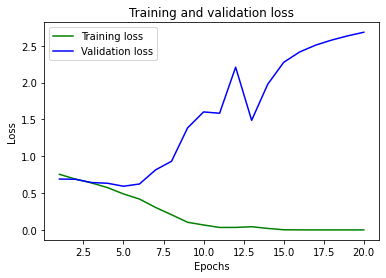

In [12]:
import matplotlib.pyplot as plt

# Plot the train and validation loss over epochs
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


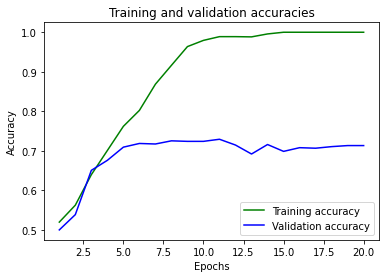

In [13]:
# Plot the train and validation loss over epochs
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracies')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [14]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)


24/24 [==============================] - 3s 129ms/step - loss: 2.7536 - accuracy: 0.7080
Test Loss: 2.753605842590332
Test Accuracy: 0.7080000042915344


In [15]:
from sklearn.metrics import classification_report, confusion_matrix
# Evaluate the model on the testing data
y_pred = model.predict(X_test)
y_pred1 = np.argmax(y_pred, axis=1)
y_test1 = np.argmax(y_test, axis=1)
confusion_matrix = confusion_matrix(y_test1, y_pred1)
print(confusion_matrix)
print(classification_report(y_test1, y_pred1))

[[263 112]
 [107 268]]
              precision    recall  f1-score   support

           0       0.71      0.70      0.71       375
           1       0.71      0.71      0.71       375

    accuracy                           0.71       750
   macro avg       0.71      0.71      0.71       750
weighted avg       0.71      0.71      0.71       750



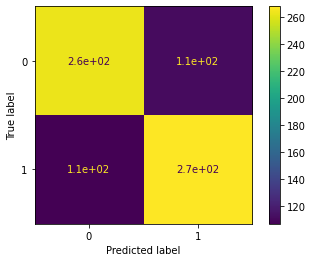

In [23]:
Fake=0
Real=1
from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [Fake, Real])
#cm_display.value_format = '2f'
cm_display.plot()
plt.show()

In [17]:
# Make predictions
# Calculate precision and recall
tp = confusion_matrix[1, 1]
fp = confusion_matrix[0, 1]
tn = confusion_matrix[0, 0]
fn = confusion_matrix[1, 0]

precision = tp / (tp + fp)
recall = tp / (tp + fn)

print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))

Precision: 0.71
Recall: 0.71
